In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
from random import randrange, uniform
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
#Set working directory
import os
os.chdir("C:/Users/Rahul/Desktop/Data Science/Use cases/DataN0106_SantanderCustomerTransaction")

In [3]:
#Read input as dataframe

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
test1 = test
train1 = train

In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:

train.shape

(200000, 202)

In [8]:
test.shape

(200000, 201)

In [9]:
test.isnull().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [10]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [11]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


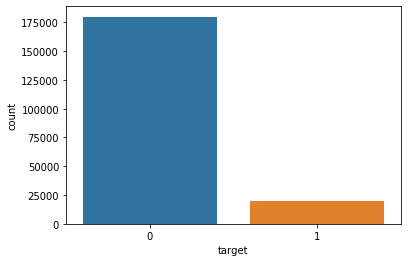

In [12]:
sns.countplot(train['target'])

In [13]:
t0 = train[train['target']==0]
t1 = train[train['target']==1]

Distributions of 1st 100 features


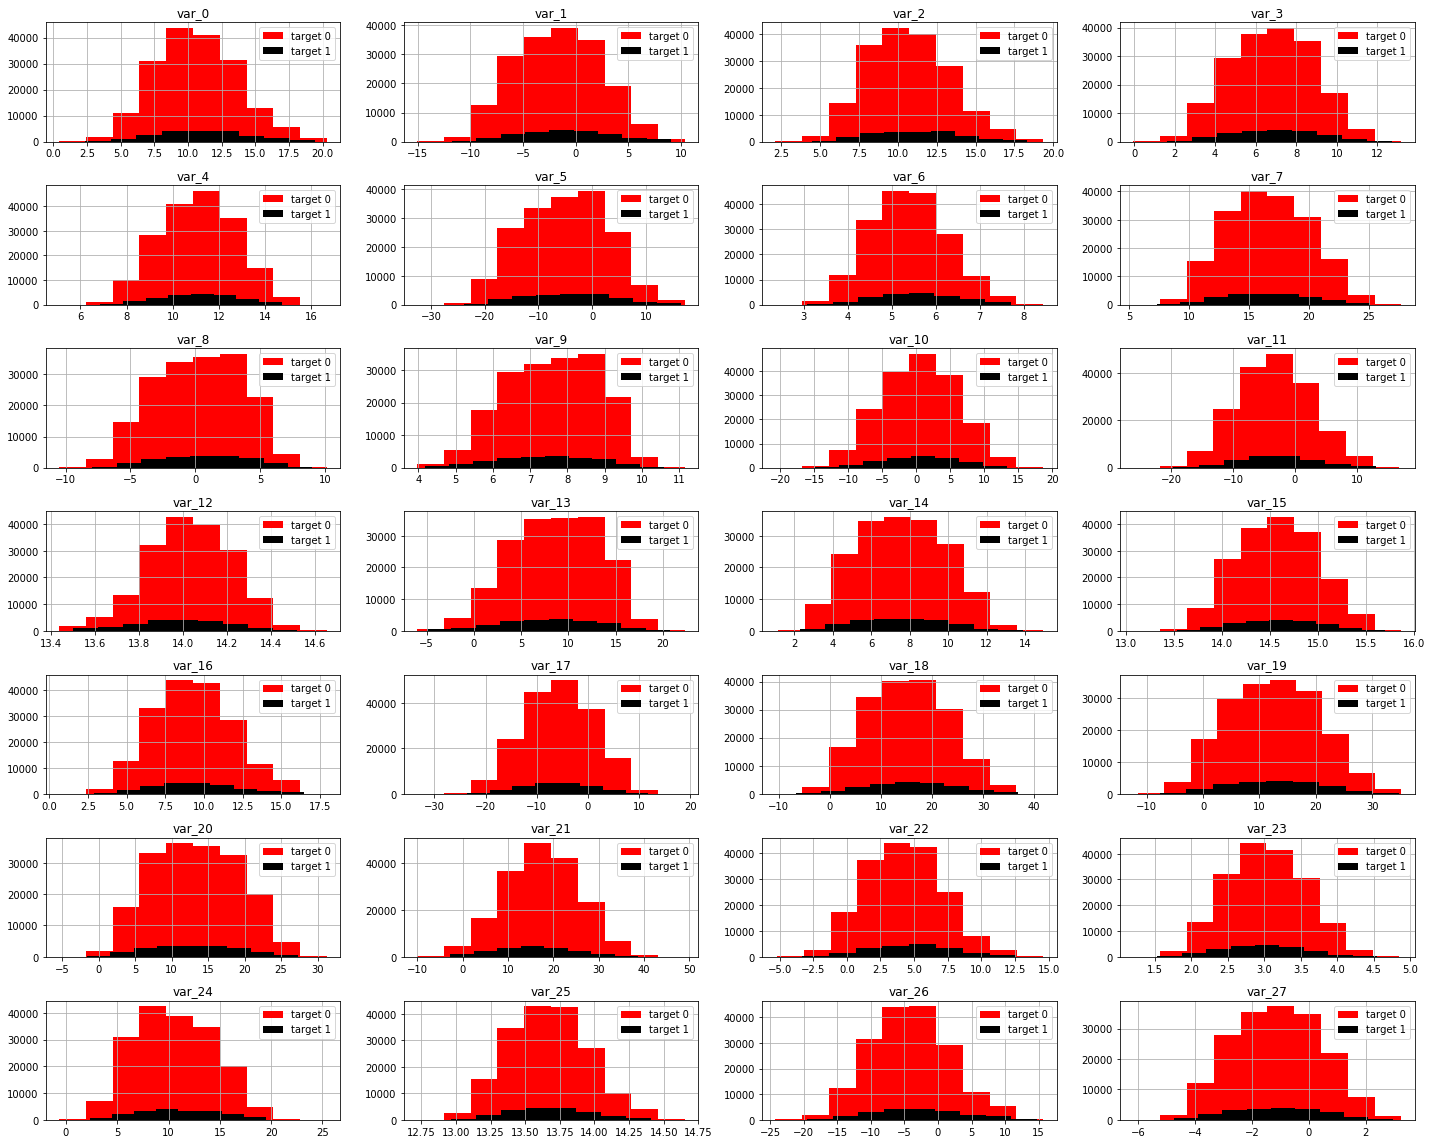

In [14]:
print('Distributions of 1st 100 features')
plt.figure(figsize=(20,16))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='red')
    plt.hist(t1[col],label='target 1',color='black')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [15]:
train.drop(['ID_code'],axis=1,inplace=True)
labels=train['target']
train.drop(['target'],axis=1,inplace=True)

In [16]:
train.select_dtypes(include='float16')

""
0
1
2
3
4
...
199995
199996
199997
199998


In [17]:
train.astype(np.float64).describe()


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [18]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [19]:
missing_data(train)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [20]:
missing_data(test)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [21]:
#Performing EDA #Mean

features = train.columns.tolist()

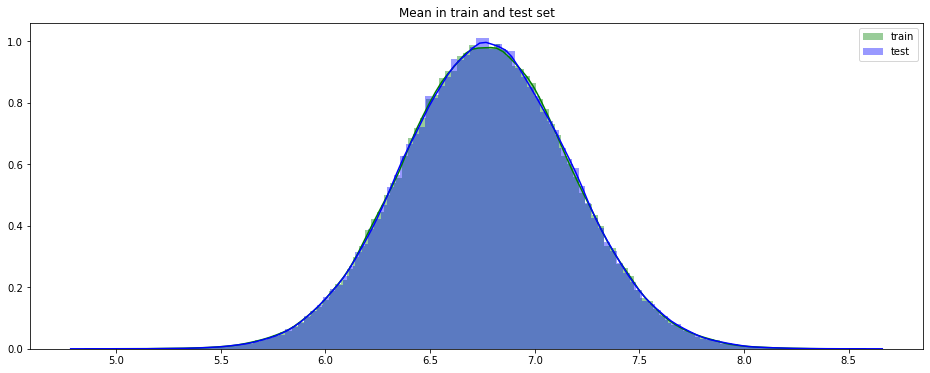

In [22]:
plt.figure(figsize=(16,6))
plt.title("Mean in train and test set")
sns.distplot(train[features].mean(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].mean(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

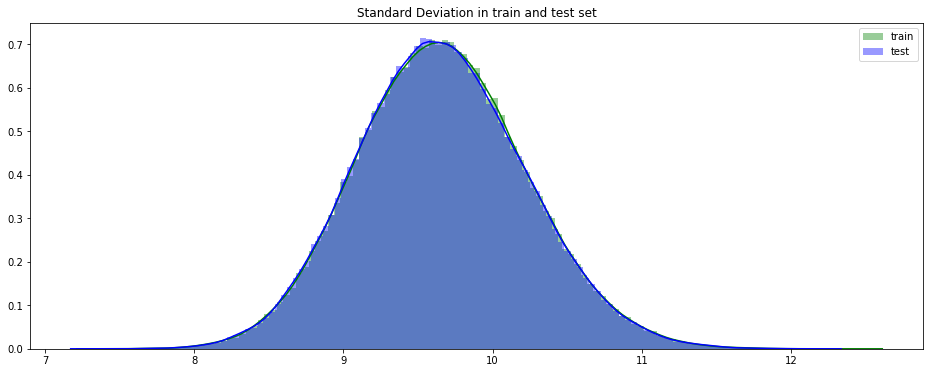

In [23]:
# Standars Deviation

plt.figure(figsize=(16,6))
plt.title("Standard Deviation in train and test set")
sns.distplot(train[features].std(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].std(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

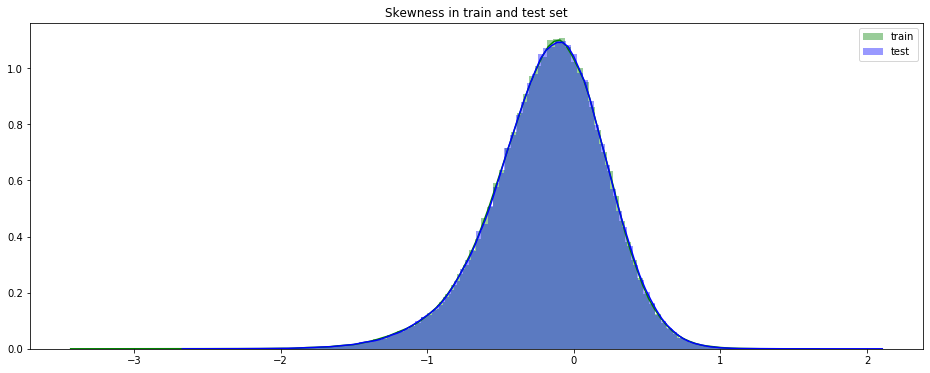

In [24]:
#Skewness

plt.figure(figsize=(16,6))
plt.title("Skewness in train and test set")
sns.distplot(train[features].skew(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].skew(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

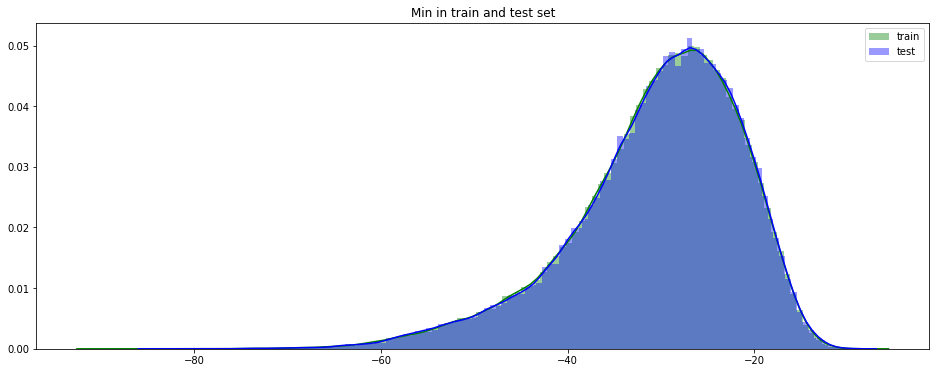

In [25]:
#Min

plt.figure(figsize=(16,6))
plt.title("Min in train and test set")
sns.distplot(train[features].min(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].min(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

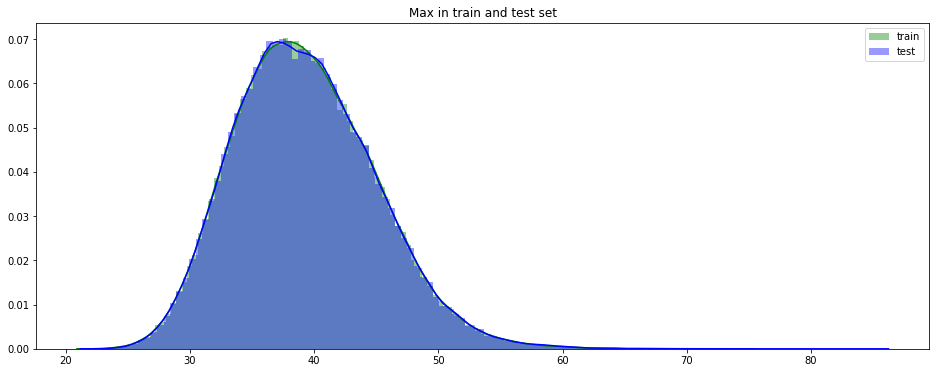

In [26]:
#Max

plt.figure(figsize=(16,6))
plt.title("Max in train and test set")
sns.distplot(train[features].max(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].max(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

In [27]:
 #Feature Engineering
    
idx = features = train.columns.values[2:202]
for df in [test, train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['med'] = df[idx].median(axis=1)

In [28]:
train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_197,var_198,var_199,sum,min,max,mean,std,skew,med
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,8.5635,12.7803,-1.0914,1454.1790,-21.4494,43.1127,7.344338,9.324130,0.100055,6.77040
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,8.7889,18.3560,1.9518,1408.0103,-47.3797,40.5632,7.111163,10.352786,-0.357548,7.22315
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,8.2675,14.7222,0.3965,1235.0330,-22.4038,33.8820,6.237540,8.772832,-0.063240,5.89940
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,10.2922,17.9697,-8.9996,1279.3233,-35.1659,38.1015,6.461229,9.617536,-0.484732,6.70260
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,9.5031,17.9974,-8.8104,1345.8775,-65.4863,41.1037,6.797361,11.326881,-1.468049,6.94735


In [29]:
# Classification Model
# Logistic Regression

trans = pd.read_csv("train.csv")

In [30]:
for i in range(2,202):
        #print(i)
        q75, q25 = np.percentile(trans.iloc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        #print(min)
        #print(max)
       
        trans = trans.drop(trans[trans.iloc[:,i] < min].index)
        trans = trans.drop(trans[trans.iloc[:,i] > max].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x288c240f508>,
 'caps': [<matplotlib.lines.Line2D at 0x28910552e48>,
 'boxes': [<matplotlib.patches.PathPatch at 0x288e8c64c08>],
 'medians': [<matplotlib.lines.Line2D at 0x289104c90c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x288c0bef648>],
 'means': []}

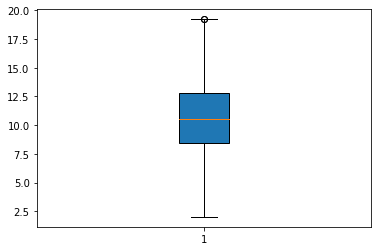

In [31]:
plt.boxplot(trans['var_0'] ,vert=True,patch_artist=True)

In [32]:
trans = trans.drop(trans.columns[0], axis = 1)


In [33]:

from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trans.drop('target',axis=1), 
                                                    trans['target'], test_size=0.30, 
                                                    random_state=101)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from math import log

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0           0.0001                -4.000000
1           0.0010                -3.000000
2           0.0100                -2.000000
3           0.1000                -1.000000
4           1.0000                 0.000000
5           5.0000                 0.698970
6          10.0000                 1.000000
7          20.0000                 1.301030
8          30.0000                 1.477121
9          40.0000                 1.602060


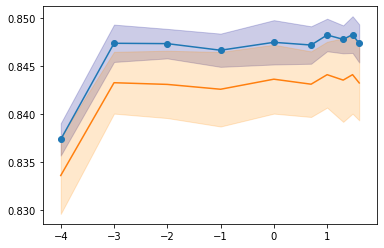

In [35]:

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV

C = LogisticRegression()

import math

parameter_data = [0.0001,0.001,0.01,0.1,1,5,10,20,30,40]

log_my_data = [math.log10(x) for x in parameter_data]

#print(log_my_data)
print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)
parameters = {'C':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(x_train, y_train)

#data={'Parameter value':[0.0001,0.001,0.01,0.1,1,5,10,20,30,40],'Corresponding Log Value':[log_my_data]}

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')

In [36]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_test)
CM = pd.crosstab(y_test, y_test)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

Text(0.5, 1, 'Confusion Matrix')

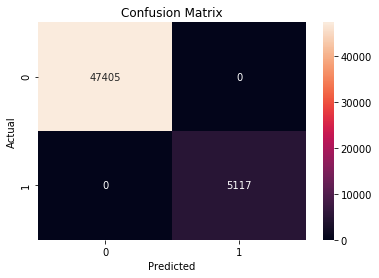

In [37]:
sns.heatmap(CM, annot=True, fmt="d" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [60]:
test =pd.read_csv("test.csv")

In [61]:
id_code = test.iloc[:,0]

In [62]:
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
neigh.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model_predict(neigh, x_train)    
y_test_pred = model_predict(neigh, x_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()

ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got warn.